In [73]:
# Import libraries for data cleaning, pre-processing and visualization

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [74]:
# load csv using pandas and store the dataframe in variable 'data'

data = pd.read_csv(r"C:\Users\navee\OneDrive - Manipal University Jaipur\Desktop\Navi MUJ\SEM-VI\DSML\project\dsml github\laptop_price.csv", encoding='latin-1')
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [76]:
# Remove extra unnecessary details from the Product Column
# Spliting the string with delimiter as opening bracket ("(")
# Returning the 1st element from the list(x[0]), the 2nd containing extra text stored inside brackets.

data["Product"] = data["Product"].str.split("(").apply(lambda x: x[0])

In [77]:
data["Product"].head()

0    MacBook Pro
1    Macbook Air
2         250 G6
3    MacBook Pro
4    MacBook Pro
Name: Product, dtype: object

In [78]:
# Extracting the CPU Speed from the CPU column
# Spliting the string with delimiter as space (" ")
# As seen from the csv, the last character(x[-1]) is the CPU speed, but we extract just the numeric value, replacing GHz with empty string

data["Cpu_Speed"] = data["Cpu"].str.split(" ").apply(lambda x: x[-1]).str.replace("GHz", "")

In [79]:
data["Cpu_Speed"].head()

0    2.3
1    1.8
2    2.5
3    2.7
4    3.1
Name: Cpu_Speed, dtype: object

In [80]:
# Extracting the CPU vendor from the CPU column
# As seen from the csv, the first character(x[0]) is the CPU vendor

data["Cpu_Vendor"] = data["Cpu"].str.split(" ").apply(lambda x: x[0])

In [81]:
data["Cpu_Vendor"].head()

0    Intel
1    Intel
2    Intel
3    Intel
4    Intel
Name: Cpu_Vendor, dtype: object

In [82]:
# Extracting the CPU type from the CPU column

data["Cpu_Type"] = data["Cpu"].str.split(" ").apply(lambda x: x[1:4] if x[1] == "Celeron" and "Pentium" and "Xeon" else (x[1:3] if (x[1] == "Core" or x[0] == "AMD") else x[0]) ).apply(lambda x: ' '.join(x))

In [83]:
data["Cpu_Type"].head()

0    Core i5
1    Core i5
2    Core i5
3    Core i7
4    Core i5
Name: Cpu_Type, dtype: object

In [84]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vendor,Cpu_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2.3,Intel,Core i5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.8,Intel,Core i5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,2.5,Intel,Core i5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2.7,Intel,Core i7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,3.1,Intel,Core i5


In [85]:
# Extracting memory value and storage type from the Memory column
# Separator is a space character ' '. The 1 argument specifies that the splitting should be done only once, resulting in a maximum of two substrings.
# The expand=True parameter indicates that the resulting split substrings should be expanded into separate columns of a DataFrame. 

split_mem = data['Memory'].str.split(' ', n=1, expand=True)
data['Storage Type'] = split_mem[1]
data['Memory'] = split_mem[0]
data["Memory"].unique()
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vendor,Cpu_Type,Storage Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2.3,Intel,Core i5,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.8,Intel,Core i5,Flash Storage
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB,Intel HD Graphics 620,No OS,1.86kg,575.00,2.5,Intel,Core i5,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2.7,Intel,Core i7,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,3.1,Intel,Core i5,SSD


In [86]:
# Extracting numeric string from RAM, by removing 'GB'
# Tranforming datatype from object to int

data["Ram"] = data["Ram"].str.replace("GB", "")
data["Ram"] = data["Ram"].astype("int64")

In [87]:
data["Ram"].head()

0     8
1     8
2     8
3    16
4     8
Name: Ram, dtype: object

In [88]:
# Extracting integer value from memory, and expanding substrings into separate dataframes

df_mem= data['Memory'].str.split('(\d+)',  expand=True)
data['Memory'] = pd.to_numeric(df_mem[1])


In [89]:
data['Memory'].head()


0    128
1    128
2    256
3    512
4    256
Name: Memory, dtype: int64

In [96]:
# Storing memory in GB only

data['Memory'] = data['Memory'].apply(lambda x: 1024 if x==1 else x)
data['Memory'] = data['Memory'].apply(lambda x: 2048 if x==2 else x)
data.rename(columns={'Memory':'Storage (GB)'}, inplace=True)


KeyError: 'Memory'

In [ ]:
data.head()

In [94]:
# Convert Weight into numeric values
# Tranforming datatype from object to float

data["Weight"]=data["Weight"].str.replace("kg","")
data["Weight"]=data["Weight"].astype("float")

In [95]:
data["Weight"].head()

0    1.37
1    1.34
2    1.86
3    1.83
4    1.37
Name: Weight, dtype: object

In [24]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Storage (GB),Gpu,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vendor,Cpu_Type,Storage Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,Intel,Core i5,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,Intel,Core i5,Flash Storage
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,575.00,2.5,Intel,Core i5,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,Intel,Core i7,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,Intel,Core i5,SSD


In [25]:
# Extract gpu vendor and type

data["Gpu_Vendor"] = data["Gpu"].str.split(" ").apply(lambda x: x[0])
data["Gpu_Type"] = data["Gpu"].str.split(" ").apply(lambda x: x[1:])
data["Gpu_Type"] = data["Gpu_Type"].apply(lambda x: ' '.join(x))
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Storage (GB),Gpu,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vendor,Cpu_Type,Storage Type,Gpu_Vendor,Gpu_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,Intel,Core i5,SSD,Intel,Iris Plus Graphics 640
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,Intel,Core i5,Flash Storage,Intel,HD Graphics 6000
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,575.00,2.5,Intel,Core i5,SSD,Intel,HD Graphics 620
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,Intel,Core i7,SSD,AMD,Radeon Pro 455
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,Intel,Core i5,SSD,Intel,Iris Plus Graphics 650


In [26]:
# numeric value assigned to categorical value

data["Touchscreen"]=data["ScreenResolution"].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [27]:
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [28]:
data[["Touchscreen","Ips"]].head()

,Touchscreen,Ips
0,0,1
1,0,0
2,0,0
3,0,1
4,0,1


In [29]:
# Catorizing The Operating System

def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

data['OpSys'] = data['OpSys'].apply(cat_os)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Storage (GB)      1303 non-null   int64  
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
 13  Cpu_Speed         1303 non-null   object 
 14  Cpu_Vendor        1303 non-null   object 
 15  Cpu_Type          1303 non-null   object 
 16  Storage Type      1303 non-null   object 


In [31]:
# Fetching out the useful columns

data = data.reindex(columns=["Company", "TypeName", "Inches", "Touchscreen", "Ips", "Cpu_Vendor", "Cpu_Type","Ram", "Storage (GB)", "Storage Type", "Gpu_Vendor", "Gpu_Type", "Weight", "OpSys", "Price_euros" ])

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1303 non-null   object 
 1   TypeName      1303 non-null   object 
 2   Inches        1303 non-null   float64
 3   Touchscreen   1303 non-null   int64  
 4   Ips           1303 non-null   int64  
 5   Cpu_Vendor    1303 non-null   object 
 6   Cpu_Type      1303 non-null   object 
 7   Ram           1303 non-null   object 
 8   Storage (GB)  1303 non-null   int64  
 9   Storage Type  1303 non-null   object 
 10  Gpu_Vendor    1303 non-null   object 
 11  Gpu_Type      1303 non-null   object 
 12  Weight        1303 non-null   object 
 13  OpSys         1303 non-null   object 
 14  Price_euros   1303 non-null   float64
dtypes: float64(2), int64(3), object(10)
memory usage: 152.8+ KB


In [33]:
data.head()

,Company,TypeName,Inches,Touchscreen,Ips,Cpu_Vendor,Cpu_Type,Ram,Storage (GB),Storage Type,Gpu_Vendor,Gpu_Type,Weight,OpSys,Price_euros
0,Apple,Ultrabook,13.3,0,1,Intel,Core i5,8,128,SSD,Intel,Iris Plus Graphics 640,1.37,Mac,1339.69
1,Apple,Ultrabook,13.3,0,0,Intel,Core i5,8,128,Flash Storage,Intel,HD Graphics 6000,1.34,Mac,898.94
2,HP,Notebook,15.6,0,0,Intel,Core i5,8,256,SSD,Intel,HD Graphics 620,1.86,Others/No OS/Linux,575.00
3,Apple,Ultrabook,15.4,0,1,Intel,Core i7,16,512,SSD,AMD,Radeon Pro 455,1.83,Mac,2537.45
4,Apple,Ultrabook,13.3,0,1,Intel,Core i5,8,256,SSD,Intel,Iris Plus Graphics 650,1.37,Mac,1803.60


In [37]:
backup = data.to_csv(r"C:\Users\navee\OneDrive - Manipal University Jaipur\Desktop\Navi MUJ\SEM-VI\DSML\project\dsml github\laptop_price(clean).csv")

<Axes: >

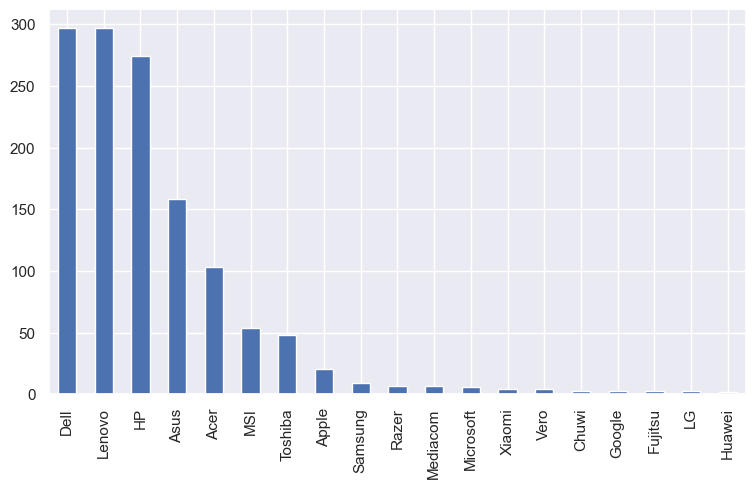

In [38]:
sns.set(rc={"figure.figsize":(9, 5)})
data['Company'].value_counts().plot(kind="bar")

<Axes: >

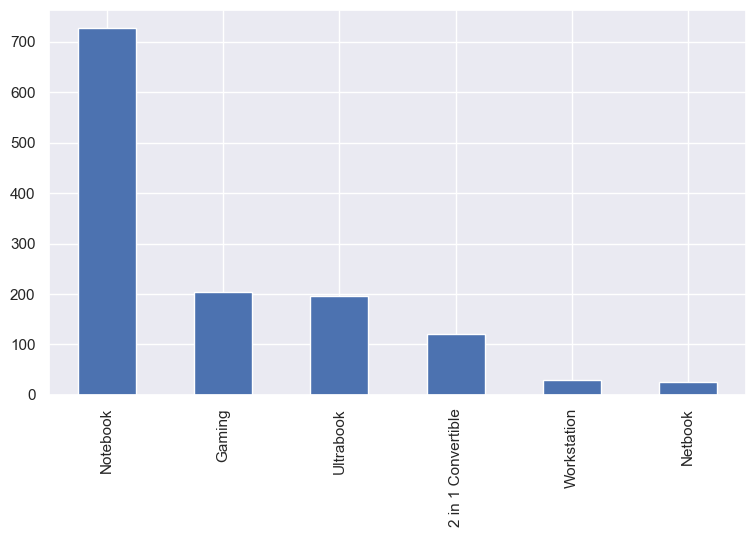

In [39]:
data["TypeName"].value_counts().plot(kind="bar")

direct checking correlation between attribites and price

In [40]:
corr_data = data.corr(numeric_only=True)
corr_data["Price_euros"].sort_values(ascending=False)

Price_euros     1.000000
Ram             0.743007
Ips             0.252208
Weight          0.210370
Touchscreen     0.191226
Inches          0.068197
Storage (GB)   -0.125363
Name: Price_euros, dtype: float64

<Axes: >

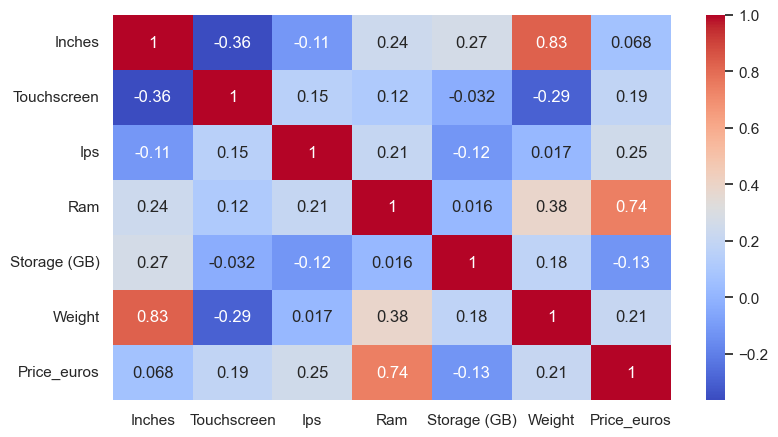

In [41]:
sns.heatmap(data.corr(numeric_only=True),cmap='coolwarm', annot=True)

In [42]:
X = data.drop(columns=['Price_euros'])
y = np.log(data['Price_euros'])

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=2)

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [45]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor

In [46]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False, handle_unknown='ignore'),[0,1,5,6,9,10,11,13])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,bootstrap=True,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mse))


C:\Users\navee\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8836765174749024
MAE 0.15652426686435636
MSE 0.04091073444592467
RMSE 0.20226402162995935


In [48]:
import matplotlib.pyplot as plt
import numpy as np

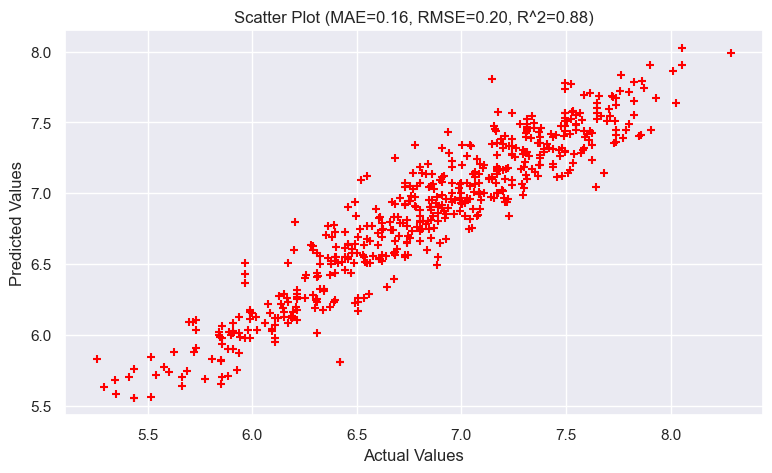

In [49]:
# Create scatter plot of predicted vs. actual values
plt.scatter(y_test, y_pred,c='red', marker='+')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Scatter Plot (MAE={mae:.2f}, RMSE={rmse:.2f}, R^2={r2:.2f})')
plt.show()


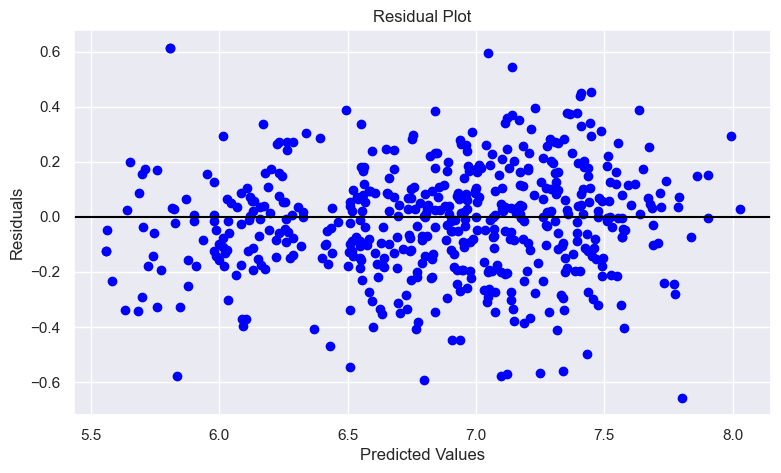

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# calculate the residuals
residuals = y_test - y_pred

# create a scatter plot of residuals vs. predicted values
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
